In [9]:
import pandas as pd

In [28]:
import matplotlib.pyplot as plt

In [11]:
wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")

In [12]:
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [13]:
#print(wood.head())

In [14]:
#print(steel.head())

In [15]:
#print(wood[wood['Name'] == 'Boulder Dash'])

In [16]:
def ranking_ot(name, material):
    
    plt.plot(material[material['Name'].str.match(name)]['Year of Rank'],\
         material[material['Name'].str.match(name)]['Rank'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title('Ranking of  '+str(name)+' over time')
    plt.subplot().invert_yaxis()
    

/Users/drakeweissman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


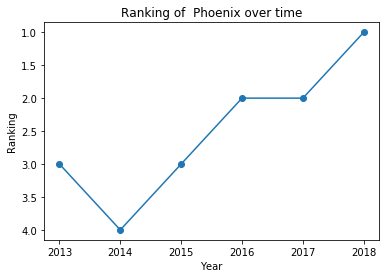

<Figure size 432x288 with 0 Axes>

In [17]:
ranking_ot('Phoenix', wood)
plt.show()
plt.clf()

/Users/drakeweissman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


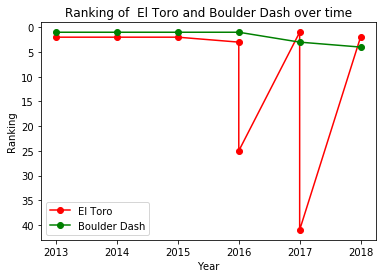

<Figure size 432x288 with 0 Axes>

In [18]:
def ranking_ot2(name,name2,material):
    plt.plot(material[material['Name'].str.match(name)]['Year of Rank'],\
         material[material['Name'].str.match(name)]['Rank'], marker='o', color='red')
    plt.plot(material[material['Name'].str.match(name2)]['Year of Rank'],\
         material[material['Name'].str.match(name2)]['Rank'], marker='o', color='green')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title('Ranking of  '+str(name)+' and '+str(name2)+' over time')
    plt.subplot().invert_yaxis()
    plt.legend(["El Toro", "Boulder Dash"])
    plt.show()
ranking_ot2("El Toro", "Boulder Dash", wood)
plt.clf()
        

/Users/drakeweissman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


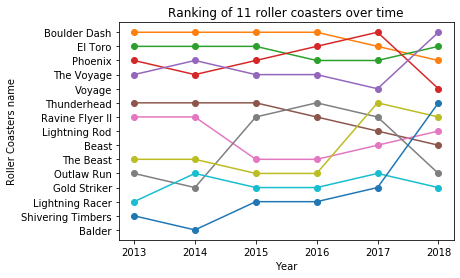

In [19]:
def print_n_ranks (n, material):
    for i in range(n):
        plt.plot(material.loc[material['Rank'] == i]['Year of Rank'],\
         material.loc[material['Rank'] == i]['Name'], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Roller Coasters name')
    plt.title('Ranking of ' + str(n) + ' roller coasters over time')
    plt.subplot().invert_yaxis()
    plt.show()
print_n_ranks(11, wood)

In [20]:
rc_stats = pd.read_csv('roller_coasters.csv')
print(rc_stats.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


/Users/drakeweissman/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/drakeweissman/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


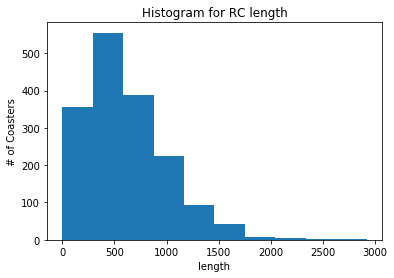

In [21]:
def histo_rc(df, column):
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('# of Coasters')
    plt.title("Histogram for RC " + str(column))
histo_rc(rc_stats, 'length')

/Users/drakeweissman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


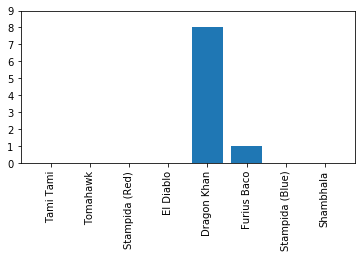

<Figure size 432x288 with 0 Axes>

In [33]:
def inversions_by_park (df, park):
    plt.bar(range(len(df[df['park'].str.match(park)])), df[df['park'].str.match(park)]['num_inversions'])
    ax = plt.subplot()
    ax.set_xticks(range(len(df[df['park'].str.match(park)])))
    ax.set_yticks(range(10))
    ax.set_xticklabels(df[df['park'].str.match(park)]['name'], rotation='vertical')
    plt.subplots_adjust(bottom=0.35)
    plt.show()
    

inversions_by_park(rc_stats, 'Port Aventura')
plt.clf()

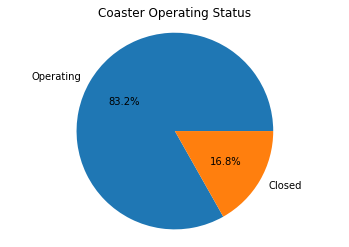

In [38]:
def  coaster_status(df):
    ok_rc = df[df["status"]== "status.operating"].park.count()
    nok_rc = df[df['status'] == "status.closed.definitely"].park.count()
    pie_labels = ['Operating', 'Closed']
    pie_data = [ok_rc, nok_rc]
    plt.pie(pie_data, labels = pie_labels, autopct = '%.1f%%')
    plt.axis('equal')
    plt.title('Coaster Operating Status')
    plt.show()
coaster_status(rc_stats)

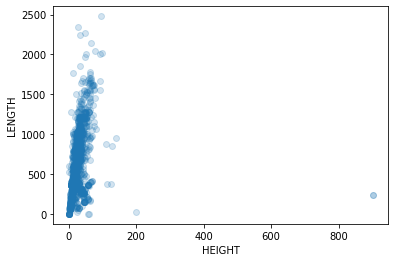

<Figure size 432x288 with 0 Axes>

In [47]:
def rc_scatter(df, column1, column2):
    plt.scatter(df[column1],df[column2], alpha =.2)
    plt.xlabel(str(column1).upper())
    plt.ylabel(str(column2).upper())
    plt.show()
rc_scatter(rc_stats,'height', 'length')

plt.clf()

In [48]:
print(rc_stats.seating_type.mode())

0    Sit Down
dtype: object
